In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sns.set(style="whitegrid")

df = pd.read_csv("../data/Project1_dataset.csv")

df.head()


,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000


### Basic EDA

In [2]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8500 non-null   object 
 1   balance_account                   8500 non-null   float64
 2   purchases_amount                  8500 non-null   float64
 3   paid_advance                      8500 non-null   float64
 4   full_purchases                    8500 non-null   float64
 5   balance_frequency_update          8500 non-null   float64
 6   installments                      8500 non-null   float64
 7   purchases_frequency               8500 non-null   float64
 8   full_purchases_frequency          8500 non-null   float64
 9   purchases_installments_frequency  8500 non-null   float64
 10  cash_advance_frequency            8500 non-null   float64
 11  nr_cash_advances                  8500 non-null   int64  
 12  nr_pur

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8499.000000,8500.000000,8500.000000,8202.000000,8500.000000
mean,1565.941403,999.561312,973.508540,588.165365,0.876272,411.708492,0.489383,0.201940,0.363796,0.135288,3.253647,14.677059,4485.848704,11.516118,1721.250989,865.594683,0.152587
std,2090.513302,2154.189460,2078.539061,1669.466184,0.237517,910.142440,0.401075,0.297756,0.397162,0.200892,6.854883,25.001561,3629.804040,1.339121,2893.200899,2389.297977,0.291505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,6.000000,0.000000,0.019163,0.000000
25%,126.318369,39.000000,0.000000,0.000000,0.875000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,12.000000,381.893717,168.712104,0.000000
50%,869.046468,360.000000,0.000000,37.400000,1.000000,89.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,12.000000,851.146952,310.399040,0.000000
75%,2053.674410,1105.897500,1113.726110,570.410000,1.000000,466.725000,0.916667,0.285714,0.750000,0.222222,4.000000,17.000000,6500.000000,12.000000,1897.014052,826.426929,0.142857
max,19043.138560,49039.570000,47137.211760,40761.250000,1.000000,22500.000000,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,12.000000,50721.483360,76406.207520,1.000000


In [3]:
df.isnull().sum()


customer_id                           0
balance_account                       0
purchases_amount                      0
paid_advance                          0
full_purchases                        0
balance_frequency_update              0
installments                          0
purchases_frequency                   0
full_purchases_frequency              0
purchases_installments_frequency      0
cash_advance_frequency                0
nr_cash_advances                      0
nr_purchases                          0
credit_limit                          1
fixed_rate_period                     0
payments                              0
min_payments                        298
full_payment_prc                      0
dtype: int64

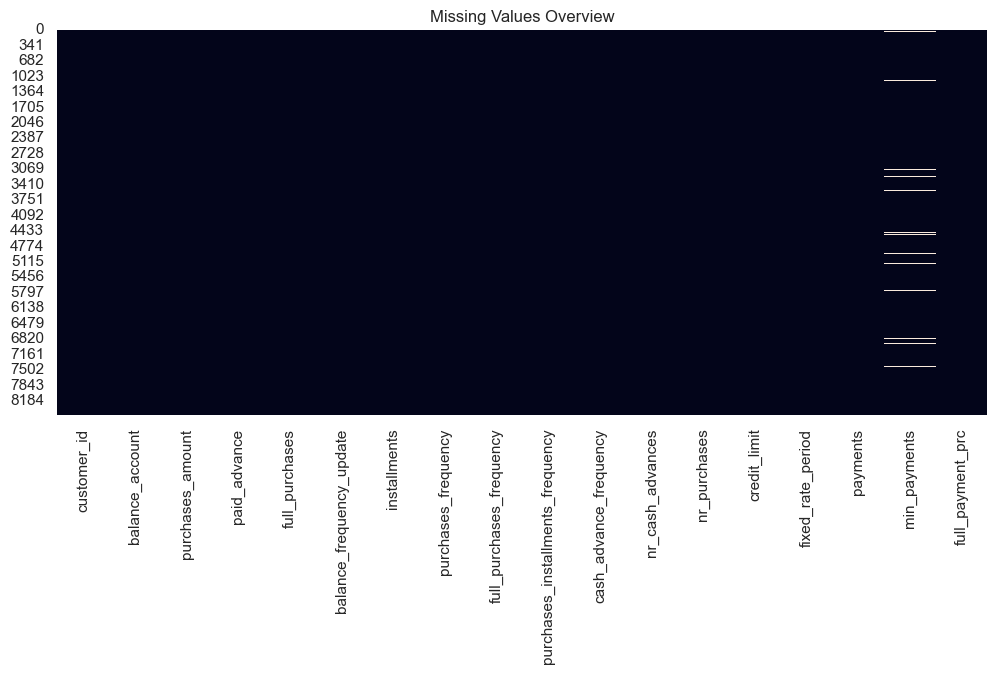

In [4]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Overview")
plt.show()


In [5]:
df.duplicated().sum()


np.int64(0)

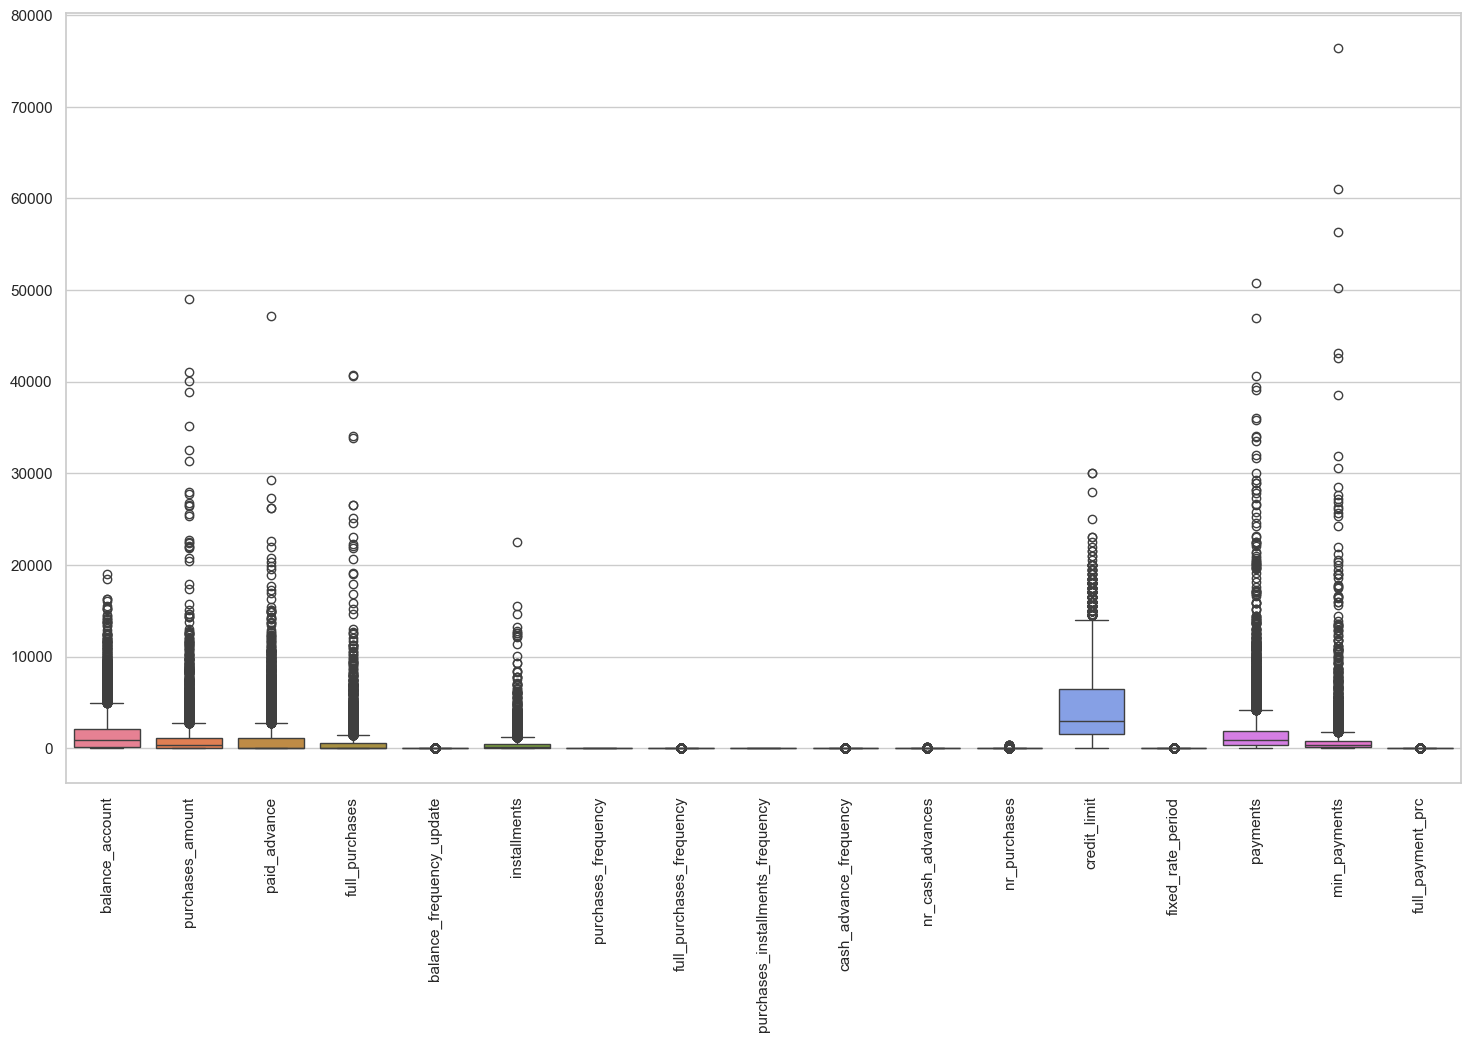

In [6]:
plt.figure(figsize=(18,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


In [ ]:
# plt.figure(figsize=(14,10))
# sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
# plt.title("Feature Correlation Heatmap")
# plt.show()


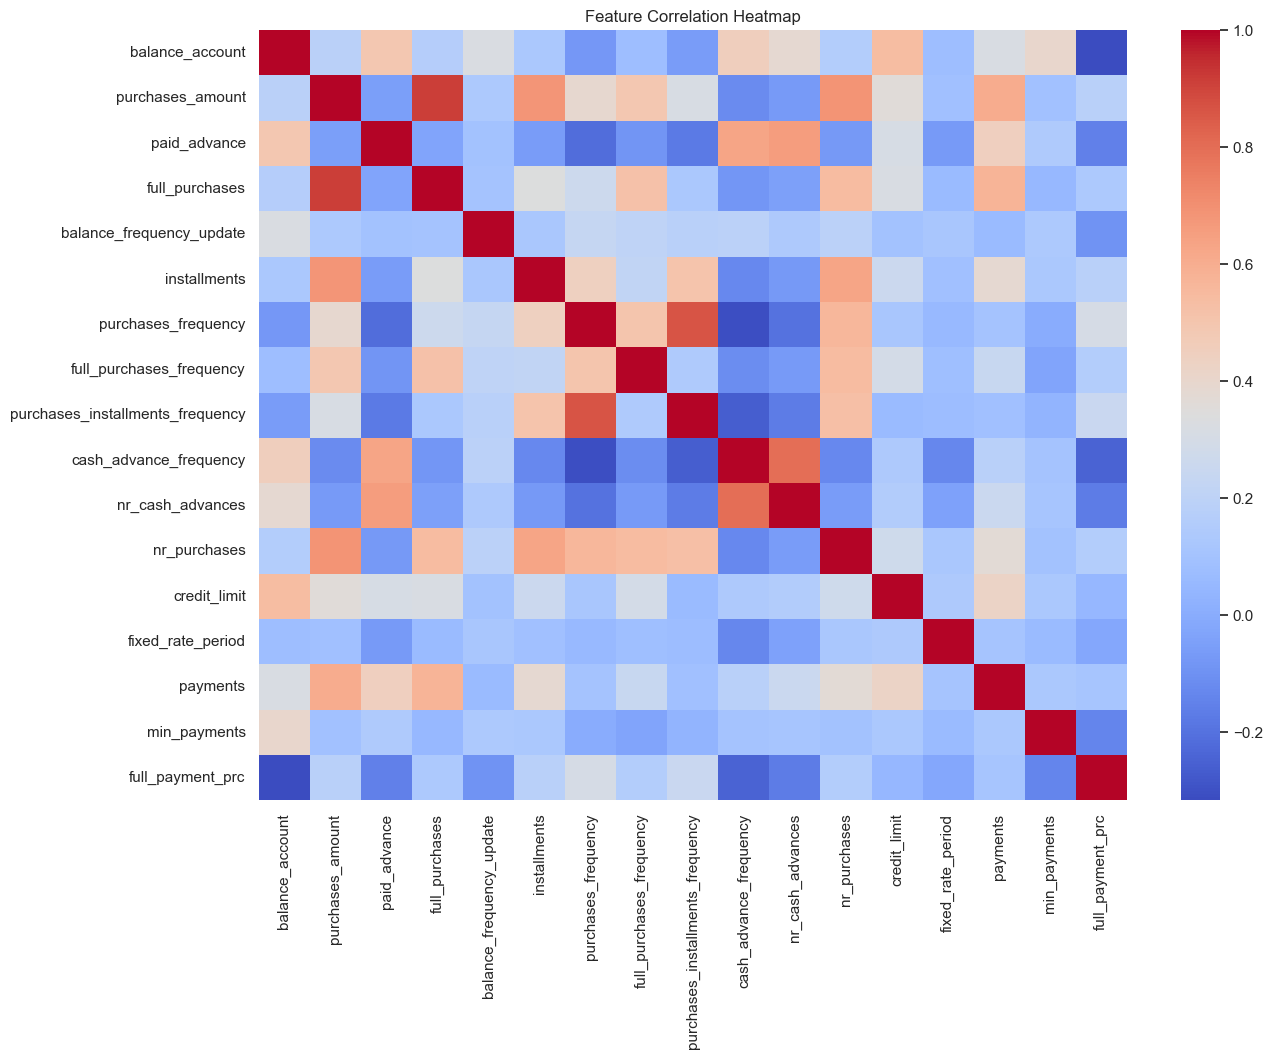

In [8]:
import numpy as np

# clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# remove infinite values
numeric_df = numeric_df.replace([np.inf, -np.inf], np.nan)

# correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
sns.pairplot(df[['balance account',
                 'purchases amount',
                 'payments',
                 'credit limit']])


KeyError: "['balance account', 'purchases amount', 'credit limit'] not in index"

In [10]:
df.skew().sort_values(ascending=False)


TypeError: could not convert string to float: 'tGEg8fT2eCgVxdwS'

In [11]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming df is your dataframe
num_features = df.select_dtypes(include=['int64', 'float64']).columns
cat_features = df.select_dtypes(include=['object']).columns

# Impute numerical features
num_imputer = SimpleImputer(strategy='median')
df[num_features] = num_imputer.fit_transform(df[num_features])

# Impute categorical features
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_features] = cat_imputer.fit_transform(df[cat_features])


In [12]:
from sklearn.preprocessing import OneHotEncoder

df = pd.get_dummies(df, columns=cat_features, drop_first=True)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [14]:
df['avg_transaction'] = df['total_spent'] / df['num_transactions']


KeyError: 'total_spent'

In [16]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Impute missing min payments with median
df['min_payments'] = df['min_payments'].fillna(df['min_payments'].median())
